In [1]:
import perda

In [2]:
csvPath = "csv files/[Practice Endurance] 05_25_23 09_39_05 PM.csv"
csvPath2 = "csv files/05_30_24 08_52_26 AM.csv"
csvPath3 = "csv files/06thJune23-40.csv"
aly = perda.create()

Analyzer Created


In [3]:
aly = perda.create()

Analyzer Created


In [4]:
aly.reset()

Reset Analyzer


In [4]:
aly.read_csv(csvPath, "sdl.currentTime")

Reading file: PER CSV Modbus Log 05/25/23 09:39:05 PM



Processing CSV: 17791117lines [00:22, 774337.54lines/s] 

Csv parsing complete.


In [5]:
variables = [
    "pcm.wheelSpeeds.frontLeft",
    "pcm.wheelSpeeds.frontRight"
]

aly.analyze_data(variables)
aly.analyze_data(variables, start_time=500, end_time=600, time_unit="s")
aly.analyze_data(variables, start_time=0, end_time=1, time_unit="s")

Statistics for **pcm.wheelSpeeds.frontLeft**
Can ID: 8387
Data amount: 21862
Start: 0.000s | End: 2,186.171s | Duration: 2,186.171s
Max Value: 48.612656 (545.281s)
Min Value: 0.0 (0.000s)
Average: 22.218141877596796
Integral: 48572.65744668767


Statistics for **pcm.wheelSpeeds.frontRight**
Can ID: 8393
Data amount: 21862
Start: 0.000s | End: 2,186.171s | Duration: 2,186.171s
Max Value: 49.28375 (544.981s)
Min Value: 0.0 (0.000s)
Average: 22.407651290833698
Integral: 48986.957430133196


Statistics for **pcm.wheelSpeeds.frontLeft**
Can ID: 8387
Data amount: 1000
Start: 500.081s | End: 599.981s | Duration: 99.900s
Max Value: 48.612656 (545.281s)
Min Value: 15.035501 (599.181s)
Average: 27.630132016116114
Integral: 2760.2501884099997


Statistics for **pcm.wheelSpeeds.frontRight**
Can ID: 8393
Data amount: 1000
Start: 500.091s | End: 599.981s | Duration: 99.890s
Max Value: 49.28375 (544.981s)
Min Value: 14.95676 (595.881s)
Average: 27.876989359370306
Integral: 2784.6324671075


Statistic

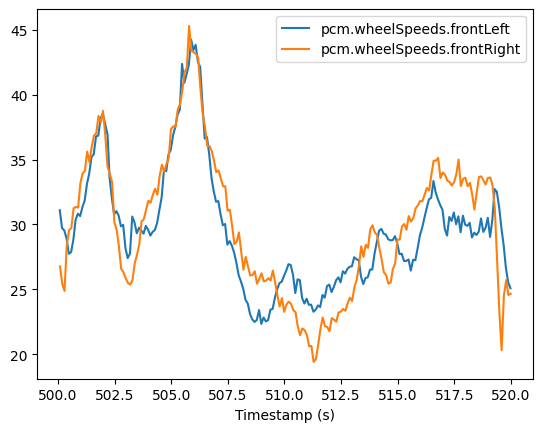

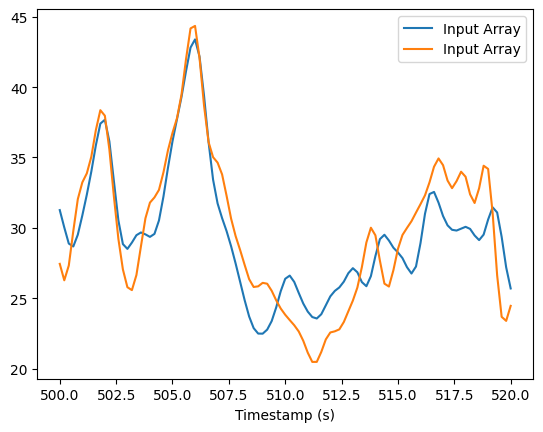

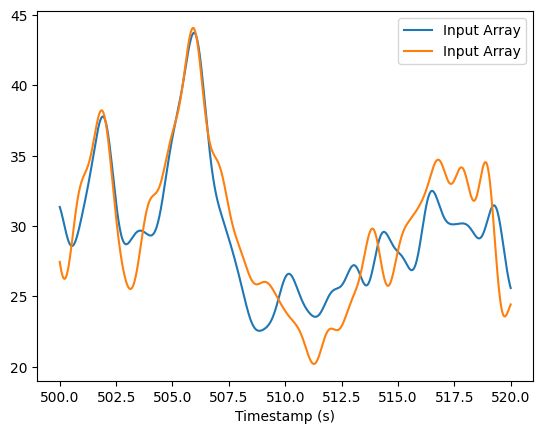

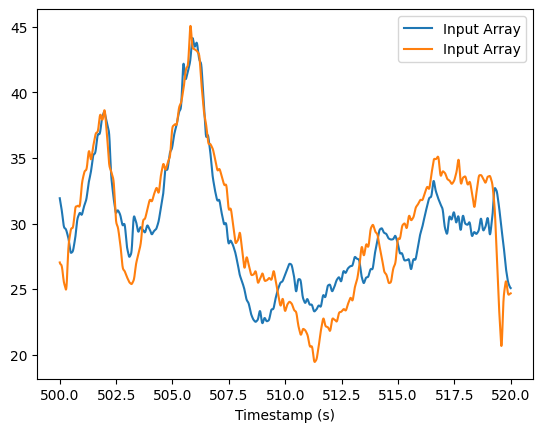

In [17]:
variables = [
    "pcm.wheelSpeeds.frontLeft",
    "pcm.wheelSpeeds.frontRight"
]

aly.plot(variables, start_time = 500, end_time = 520)

fft_arr = aly.get_band_filter(variables, sample_frequency=5, filtered_lower_band=1)
aly.plot(fft_arr, start_time = 500, end_time = 520)

fft_arr = aly.get_band_filter(variables, sample_frequency=50, filtered_lower_band=1)
aly.plot(fft_arr, start_time = 500, end_time = 520)

fft_arr = aly.get_band_filter(variables, sample_frequency=500, filtered_lower_band=10)
aly.plot(fft_arr, start_time = 500, end_time = 520)

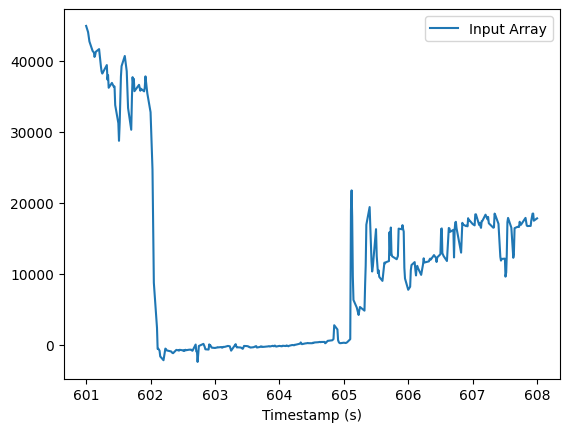

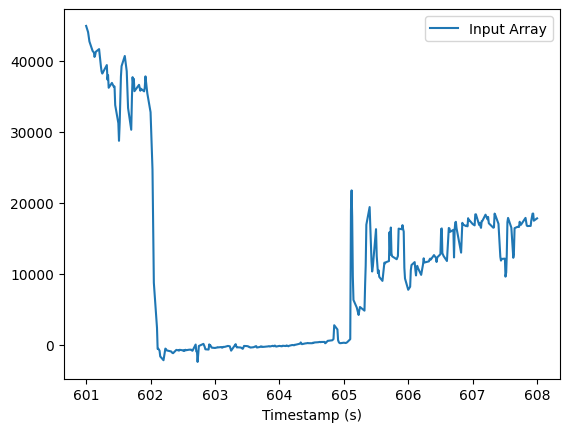

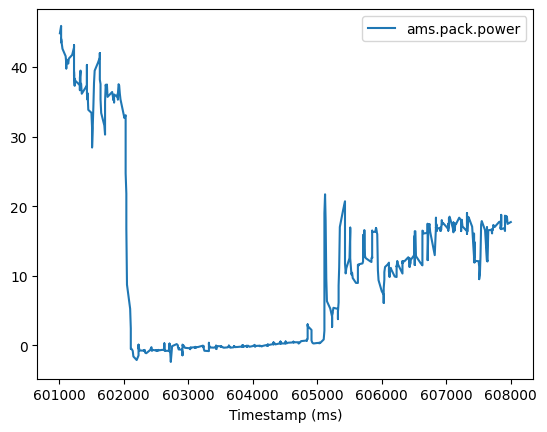




graph for ams.pack.voltage and ams.pack.current


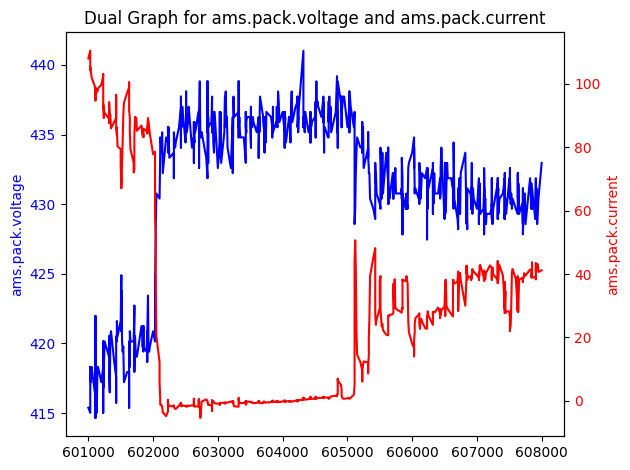

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
v_op = [
    "ams.pack.voltage",
    "*",
    "ams.pack.current"
]

v_al = [
    "ams.pack.voltage",
    "ams.pack.current"
]

power = aly.get_compute_arrays(v_op, match_type="connect")
alist = aly.align_array(v_al, match_type="connect")

product_second_col = alist[0][:, 1] * alist[1][:, 1]
# Combine into a new array (using columns from array1, except the second column)
combined_array = np.column_stack((
    alist[0][:, 0],       # First column (shared)
    product_second_col,  # New second column (product)
    alist[0][:, 2],       # Third column (shared)
    alist[0][:, 3]        # Fourth column (shared)
))


variables = [power]
aly.plot(variables, start_time = 601, end_time = 608, time_unit = "s")

variables = [combined_array]
aly.plot(variables, start_time = 601, end_time = 608, time_unit = "s")

variables = ["ams.pack.power"]
aly.plot(variables, start_time = 601000, end_time = 608000, time_unit = "ms")

aly.plot_dual(v_al, start_time = 601000, end_time = 608000, time_unit = "ms")